<a href="https://colab.research.google.com/github/suparnakanoo/Waste-Classification-System-Using-Image-Processing/blob/main/Waste_Classification_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#set the directory
input_file = '/content/drive/MyDrive/Waste Images'
output_file = '/content/drive/MyDrive/Waste Images Splitted'

In [ ]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [ ]:
splitfolders.ratio(input_file, output= output_file, seed=337, ratio=(.8, 0.1,0.1))

Copying files: 2444 files [01:18, 30.97 files/s]


In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # crawls inside folders
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="/content/drive/MyDrive/Waste Images Splitted/train"
test_dir="/content/drive/MyDrive/Waste Images Splitted/test"

In [ ]:
#train file image count
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*"))
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

7 Classes
1952 Train images
251 Test images


In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
     fill_mode='nearest',
    horizontal_flip=True,
     vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 1952 images belonging to 7 classes.
Found 251 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

IMAGE_SIZE = [224, 224]

# Load the InceptionV3 model with weights pre-trained on ImageNet
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the existing weights
for layer in inception.layers:
    layer.trainable = False

# Add your own classification head to the model
x = GlobalAveragePooling2D()(inception.output)
x = Dense(256, activation='relu')(x)
output = Dense(7, activation='softmax')(x)

# Create a new model with the InceptionV3 base and your classification head
model = Model(inputs=inception.input, outputs=output)

# Compile the model (add optimizer, loss function, etc. based on your task)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the model
model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 251 images belonging to 7 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=None,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=None,
                    verbose=1,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.001)],
                    use_multiprocessing=False,
                    shuffle=True)


Epoch 1/10
61/61 [==============================] - 276s 4s/step - loss: 0.5899 - accuracy: 0.8038 - val_loss: 0.3485 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 2/10
61/61 [==============================] - 273s 4s/step - loss: 0.2633 - accuracy: 0.9052 - val_loss: 0.3826 - val_accuracy: 0.8765 - lr: 0.0010
Epoch 3/10
61/61 [==============================] - 274s 4s/step - loss: 0.2076 - accuracy: 0.9283 - val_loss: 0.3377 - val_accuracy: 0.9243 - lr: 0.0010
Epoch 4/10
61/61 [==============================] - 261s 4s/step - loss: 0.1621 - accuracy: 0.9483 - val_loss: 0.3021 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 5/10
61/61 [==============================] - 260s 4s/step - loss: 0.1471 - accuracy: 0.9467 - val_loss: 0.3887 - val_accuracy: 0.8884 - lr: 0.0010
Epoch 6/10
61/61 [==============================] - 262s 4s/step - loss: 0.1449 - accuracy: 0.9513 - val_loss: 0.2526 - val_accuracy: 0.9283 - lr: 0.0010
Epoch 7/10
61/61 [==============================] - 265s 4s/step - loss: 0.1

In [ ]:
result = model.evaluate(train_generator)
dict(zip(model.metrics_names, result))

61/61 [==============================] - 233s 4s/step - loss: 0.0726 - accuracy: 0.9775


{'loss': 0.07255841046571732, 'accuracy': 0.9774590134620667}

In [ ]:
result = model.evaluate(validation_generator)
dict(zip(model.metrics_names, result))

8/8 [==============================] - 30s 4s/step - loss: 0.2882 - accuracy: 0.9203


{'loss': 0.2882116138935089, 'accuracy': 0.9203187227249146}

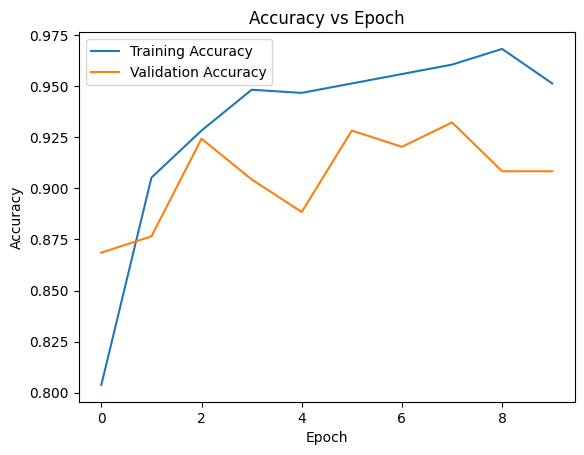

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

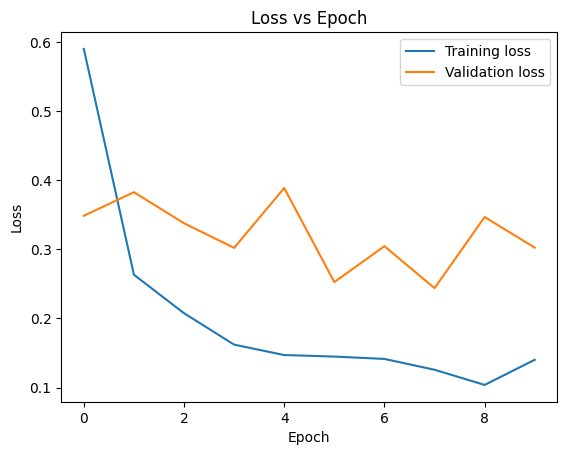

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming test_dir is the path to your validation data directory
validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Adjust this based on your problem (binary or multiclass)
    shuffle=False  # Keep the order for evaluation
)

# Assuming model is your trained model
# Assuming history and plt are already defined in your code

# Make predictions on the validation set
predictions = model.predict(validation_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Obtain true labels from the validation generator
true_labels = validation_generator.classes

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

Found 251 images belonging to 7 classes.
8/8 [==============================] - 31s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.88      0.94      0.91        32
           2       0.87      0.85      0.86        40
           3       1.00      0.97      0.98        58
           4       0.91      0.94      0.93        33
           5       0.83      0.86      0.85        29
           6       0.89      0.89      0.89        28

    accuracy                           0.91       251
   macro avg       0.90      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251



8/8 [==============================] - 38s 4s/step


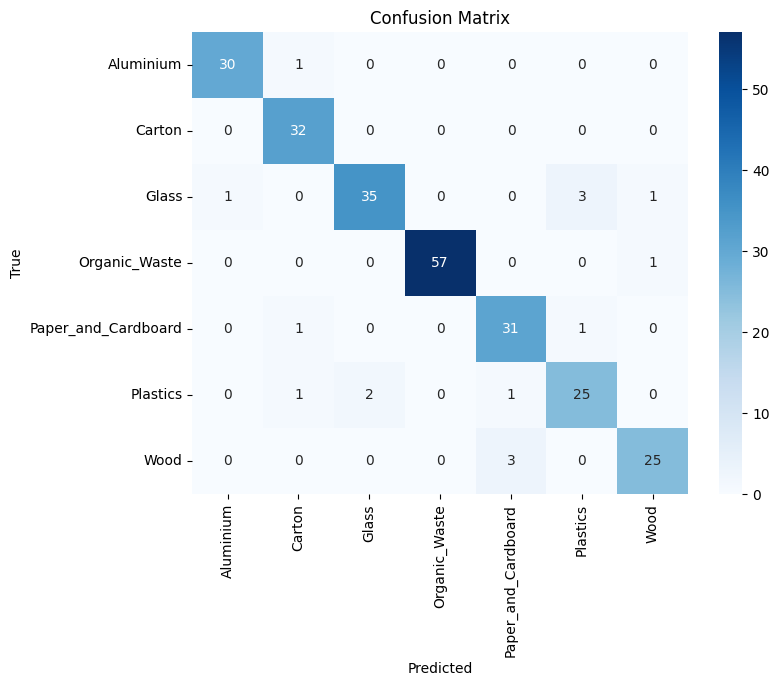

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model is your trained model
# Assuming validation_generator contains validation data and labels

# Make predictions on the validation set
predictions = model.predict(validation_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Obtain true labels from the validation generator
true_labels = validation_generator.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
class_names = validation_generator.class_indices.keys()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/FYP Saved Model/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


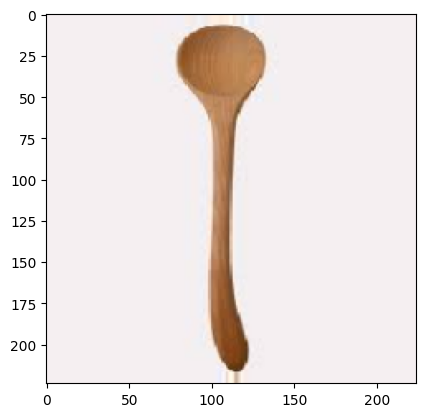

1/1 [==============================] - 7s 7s/step
Predicted Class: Wood


In [ ]:
import random
import matplotlib.pyplot as plt

# Dictionary mapping numeric labels to class names
class_names = {
    0: "Aluminium",
    1: "Carton",
    2: "Glass",
    3: "Organic Waste",
    4: "Paper and Cardboard",
    5: "Plastics",
    6: "Wood"
}
index = random.randint(0, len(train_generator) - 1)

# Getting a batch of images from the training generator
batch = train_generator[index]

# Extracting the images and labels from the batch
X_batch, Y_batch = batch

# Displaying one random image from the batch
plt.imshow(X_batch[0])
plt.show()


# Making predictions on the random image
y_pred = model.predict(X_batch)

# Assuming we're interested in the prediction for the first image in the batch
prediction = y_pred[0]

# Mapping prediction probabilities to class names
predicted_class_index = prediction.argmax()
predicted_class_name = class_names[predicted_class_index]

# Printing the predicted class name
print("Predicted Class:", predicted_class_name)

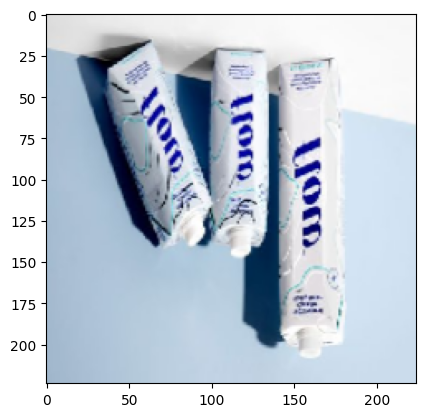

1/1 [==============================] - 3s 3s/step
Predicted Class: Carton


In [ ]:
# Dictionary mapping numeric labels to class names
class_names = {
    0: "Aluminium",
    1: "Carton",
    2: "Glass",
    3: "Organic Waste",
    4: "Paper and Cardboard",
    5: "Plastics",
    6: "Wood"
}
# Generating a random index for visualization from the training set
index2 = random.randint(0, len(train_generator) - 1)

# Getting a batch of images from the training generator
batch = train_generator[index2]

# Extracting the images and labels from the batch
X_batch, Y_batch = batch

# Displaying one random image from the batch
plt.imshow(X_batch[0])
plt.show()

# Making predictions on the random image
y_pred = model.predict(X_batch)

# Assuming we're interested in the prediction for the first image in the batch
prediction = y_pred[0]

# Mapping prediction probabilities to class names
predicted_class_index = prediction.argmax()
predicted_class_name = class_names[predicted_class_index]

# Printing the predicted class name
print("Predicted Class:", predicted_class_name)

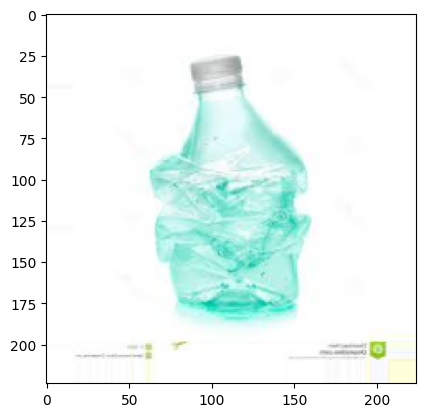

1/1 [==============================] - 5s 5s/step
Predicted Class: Plastics


In [ ]:

index3 = random.randint(0, len(train_generator) - 1)

# Getting a batch of images from the training generator
batch = train_generator[index3]

# Extracting the images and labels from the batch
X_batch, Y_batch = batch

# Displaying one random image from the batch
plt.imshow(X_batch[0])
plt.show()

# Assuming your model is already defined and trained
# Making predictions on the random image
y_pred = model.predict(X_batch)

# Assuming you're interested in the prediction for the first image in the batch
prediction = y_pred[0]

# Mapping prediction probabilities to class names
predicted_class_index = prediction.argmax()
predicted_class_name = class_names[predicted_class_index]

# Printing the predicted class name
print("Predicted Class:", predicted_class_name)